In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_context("poster")
# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
import os
path = "data/core/"
os.listdir(path)

['Appearances.csv',
 'Managers.csv',
 'AwardsManagers.csv',
 'SeriesPost.csv',
 'People.csv',
 'readme2014.txt',
 'FieldingOFsplit.csv',
 'Pitching.csv',
 'HallOfFame.csv',
 'AllstarFull.csv',
 'AwardsPlayers.csv',
 'FieldingPost.csv',
 'TeamsFranchises.csv',
 'Schools.csv',
 'Salaries.csv',
 'TeamsHalf.csv',
 'Fielding.csv',
 'Teams.csv',
 'Parks.csv',
 'BattingPost.csv',
 'CollegePlaying.csv',
 'HomeGames.csv',
 'FieldingOF.csv',
 'ManagersHalf.csv',
 'PitchingPost.csv',
 'AwardsShareManagers.csv',
 'Batting.csv',
 'AwardsSharePlayers.csv']

In [3]:
salaries = pd.read_csv("data/core/Salaries.csv")
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
teams = pd.read_csv("data/core/Teams.csv")
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [5]:
sal_by_team_by_year = salaries.groupby(["teamID", "yearID"]).sum()
sal_by_team_by_year.head(10)

salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
       2002     61721667
       2003     79031667
       2004    100534667
ARI    1998     32347000
       1999     68703999

In [6]:
sal_by_team_by_year.sort_values(by='salary', ascending=False) 
sal_by_team_by_year.max()  

salary    231978886
dtype: int64

Mergeing the  summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year year.  

- Merge the DataFrames using teamID and yearID.

In [7]:
teams_wins_year = teams.groupby(["teamID", "yearID"]).sum()
teams_wins_year.head()

Rank    G  Ghome   W   L    R    AB     H   2B  3B  ...    HA  \
teamID yearID                                                      ...         
ALT    1884      10   25    0.0   6  19   90   899   223   30   6  ...   292   
ANA    1997       2  162   82.0  84  78  829  5628  1531  279  25  ...  1506   
       1998       2  162   81.0  85  77  787  5630  1530  314  27  ...  1481   
       1999       4  162   81.0  70  92  711  5494  1404  248  22  ...  1472   
       2000       3  162   81.0  82  80  864  5628  1574  309  34  ...  1534   

               HRA  BBA   SOA    E   DP     FP  attendance  BPF  PPF  
teamID yearID                                                         
ALT    1884      3   52    93  156    4  0.862         0.0  101  109  
ANA    1997    202  605  1050  123  140  0.980   1767330.0  102  102  
       1998    164  630  1091  106  146  0.983   2519280.0  102  102  
       1999    177  624   877  106  156  0.983   2253123.0   99  100  
       2000    228  662   846  134  182  0.978   2066982.0  102  103  

[5 rows x 34 columns]

In [8]:
df= teams_wins_year.join( sal_by_team_by_year,on= ["teamID", "yearID"])
df.head()

Rank    G  Ghome   W   L    R    AB     H   2B  3B  ...  HRA  \
teamID yearID                                                      ...        
ALT    1884      10   25    0.0   6  19   90   899   223   30   6  ...    3   
ANA    1997       2  162   82.0  84  78  829  5628  1531  279  25  ...  202   
       1998       2  162   81.0  85  77  787  5630  1530  314  27  ...  164   
       1999       4  162   81.0  70  92  711  5494  1404  248  22  ...  177   
       2000       3  162   81.0  82  80  864  5628  1574  309  34  ...  228   

               BBA   SOA    E   DP     FP  attendance  BPF  PPF      salary  
teamID yearID                                                                
ALT    1884     52    93  156    4  0.862         0.0  101  109         NaN  
ANA    1997    605  1050  123  140  0.980   1767330.0  102  102  31135472.0  
       1998    630  1091  106  146  0.983   2519280.0  102  102  41281000.0  
       1999    624   877  106  156  0.983   2253123.0   99  100  55388166.0  
       2000    662   846  134  182  0.978   2066982.0  102  103  51464167.0  

[5 rows x 35 columns]

  W Wins <BR> L Losses

In [9]:
df.columns.get_loc
sal_by_team_by_year= df[[ 'salary','W', 'L']]
sal_by_team_by_year.head()

salary   W   L
teamID yearID                    
ALT    1884           NaN   6  19
ANA    1997    31135472.0  84  78
       1998    41281000.0  85  77
       1999    55388166.0  70  92
       2000    51464167.0  82  80

In [10]:
sal_by_team_by_year.describe()

,salary,W,L
count,9.180000e+02,2895.000000,2895.000000
mean,6.004263e+07,74.942314,74.942314
std,4.330992e+07,17.530459,17.274056
min,8.800000e+05,0.000000,4.000000
25%,2.543571e+07,66.000000,66.000000
50%,5.053732e+07,77.000000,76.000000
75%,8.441608e+07,87.000000,87.000000
max,2.319789e+08,116.000000,134.000000


In [23]:
sal_by_team_by_year.shape

(2895, 3)

#Clean the table
found that more than 50% missing data

In [27]:
#sal_by_team_by_year[~sal_by_team_by_year.isin([np.nan, np.inf, -np.inf]).any(1)]
sal_by_team_by_year[~sal_by_team_by_year.isin([np.nan ]).any(1)]
sal_by_team_by_year[sal_by_team_by_year.isin([np.nan ]).any(1)]

salary   W   L
teamID yearID                
ALT    1884       NaN   6  19
ARI    2017       NaN  93  69
       2018       NaN  82  80
ATL    1966       NaN  85  77
       1967       NaN  77  85
...               ...  ..  ..
WS8    1887       NaN  46  76
       1888       NaN  48  86
       1889       NaN  41  83
WS9    1891       NaN  44  91
WSU    1884       NaN  47  65

[1977 rows x 3 columns]

In [31]:
#Eavrege salary per team and year to replace nans
df= sal_by_team_by_year[['salary' ]].groupby(['teamID','yearID']).mean() 
df[df.isin([np.nan ]).any(1)]


salary
teamID yearID        
ALT    1884       NaN
ARI    2017       NaN
       2018       NaN
ATL    1966       NaN
       1967       NaN
...               ...
WS8    1887       NaN
       1888       NaN
       1889       NaN
WS9    1891       NaN
WSU    1884       NaN

[1977 rows x 1 columns]

#no salary info are on the same year so now mean thus will be removed furst

In [33]:
sal_by_team_by_year.dropna(inplace=True)
print(sal_by_team_by_year[sal_by_team_by_year.isin([np.nan ]).any(1)])
sal_by_team_by_year

Empty DataFrame
Columns: [salary, W, L]
Index: []


/home/ragia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


salary   W   L
teamID yearID                     
ANA    1997     31135472.0  84  78
       1998     41281000.0  85  77
       1999     55388166.0  70  92
       2000     51464167.0  82  80
       2001     47535167.0  75  87
...                    ...  ..  ..
WAS    2012     80855143.0  98  64
       2013    113703270.0  86  76
       2014    131983680.0  96  66
       2015    155587472.0  83  79
       2016    141652646.0  95  67

[918 rows x 3 columns]

### relationship between total wins and total salaries for a given year       

In [34]:
sal_by_team_by_year2= sal_by_team_by_year.reset_index()
sal_by_team_by_year2.head() 

,teamID,yearID,salary,W,L
0,ANA,1997,31135472.0,84,78
1,ANA,1998,41281000.0,85,77
2,ANA,1999,55388166.0,70,92
3,ANA,2000,51464167.0,82,80
4,ANA,2001,47535167.0,75,87


Text(0.5, 1.0, 'Wins')

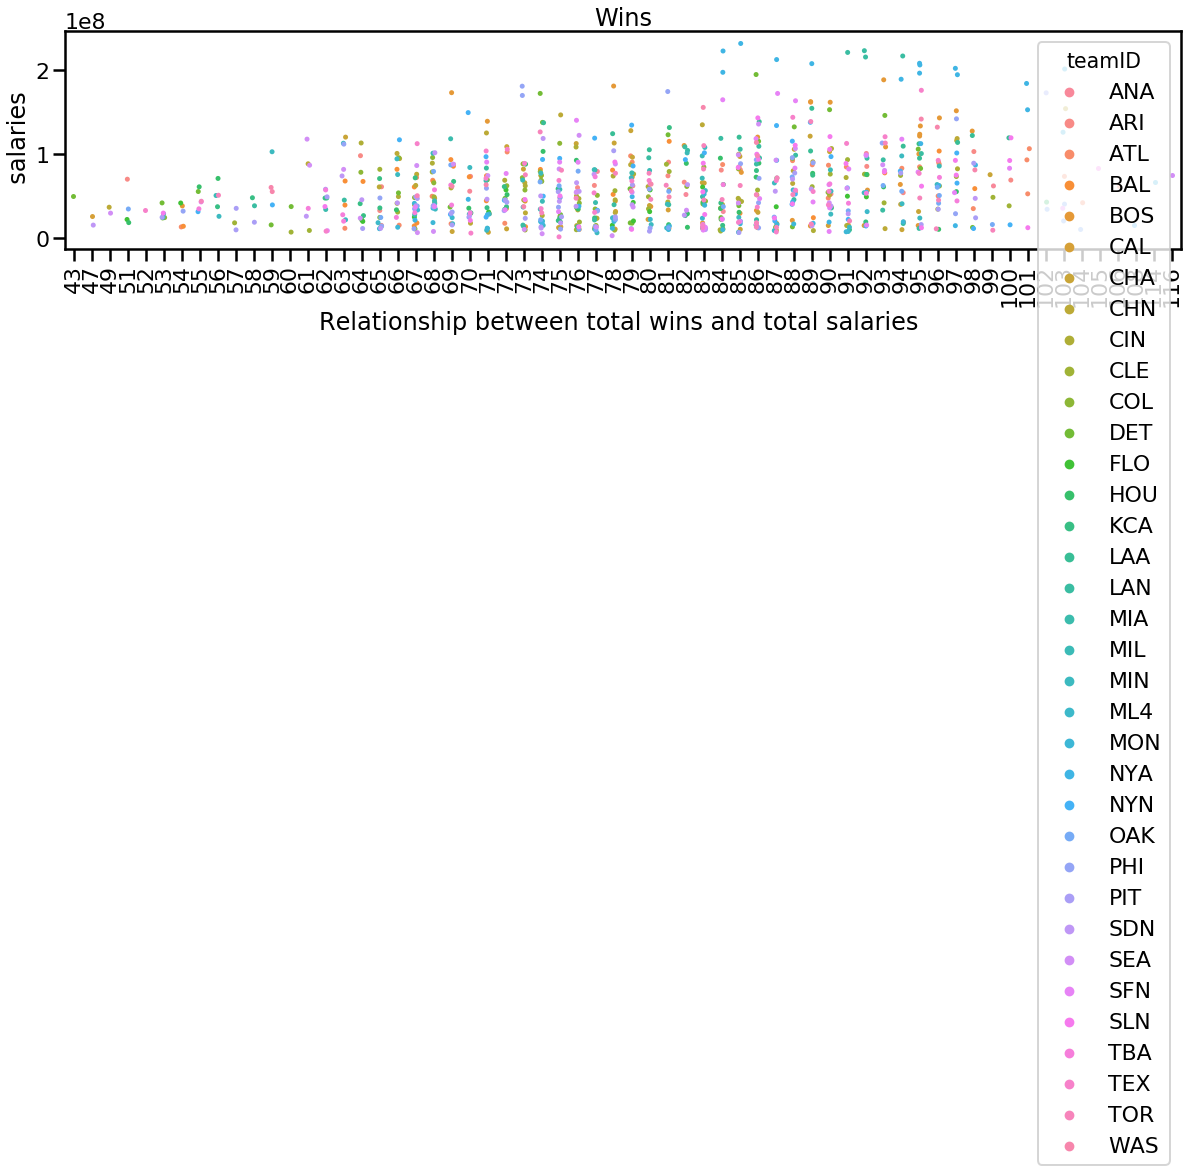

In [35]:
plt.figure(figsize=(20,4))

sns.stripplot(data=sal_by_team_by_year2, x='W', y='salary'  , hue='teamID'  ,  size=5);
plt.xlabel("Relationship between total wins and total salaries ")
plt.ylabel("  salaries ")
plt.xticks(rotation=90)
plt.title("Wins")
 

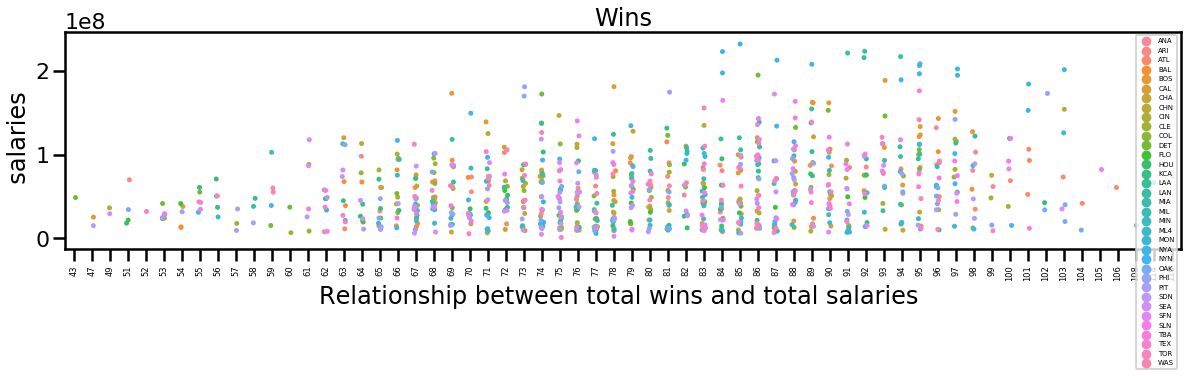

In [36]:
plt.figure(figsize=(20,4)) 
sal_by_team_by_year2= sal_by_team_by_year.reset_index()
sal_by_team_by_year2.head() 
sns.stripplot(data=sal_by_team_by_year2, x='W', y='salary'  , hue="teamID"   );
plt.xlabel("Relationship between total wins and total salaries ")
plt.ylabel("  salaries ")
plt.xticks(rotation=90 ,fontsize='small')
plt.title("Wins")
plt.legend(fontsize='x-small', title_fontsize='20')

### plot  clearer figure

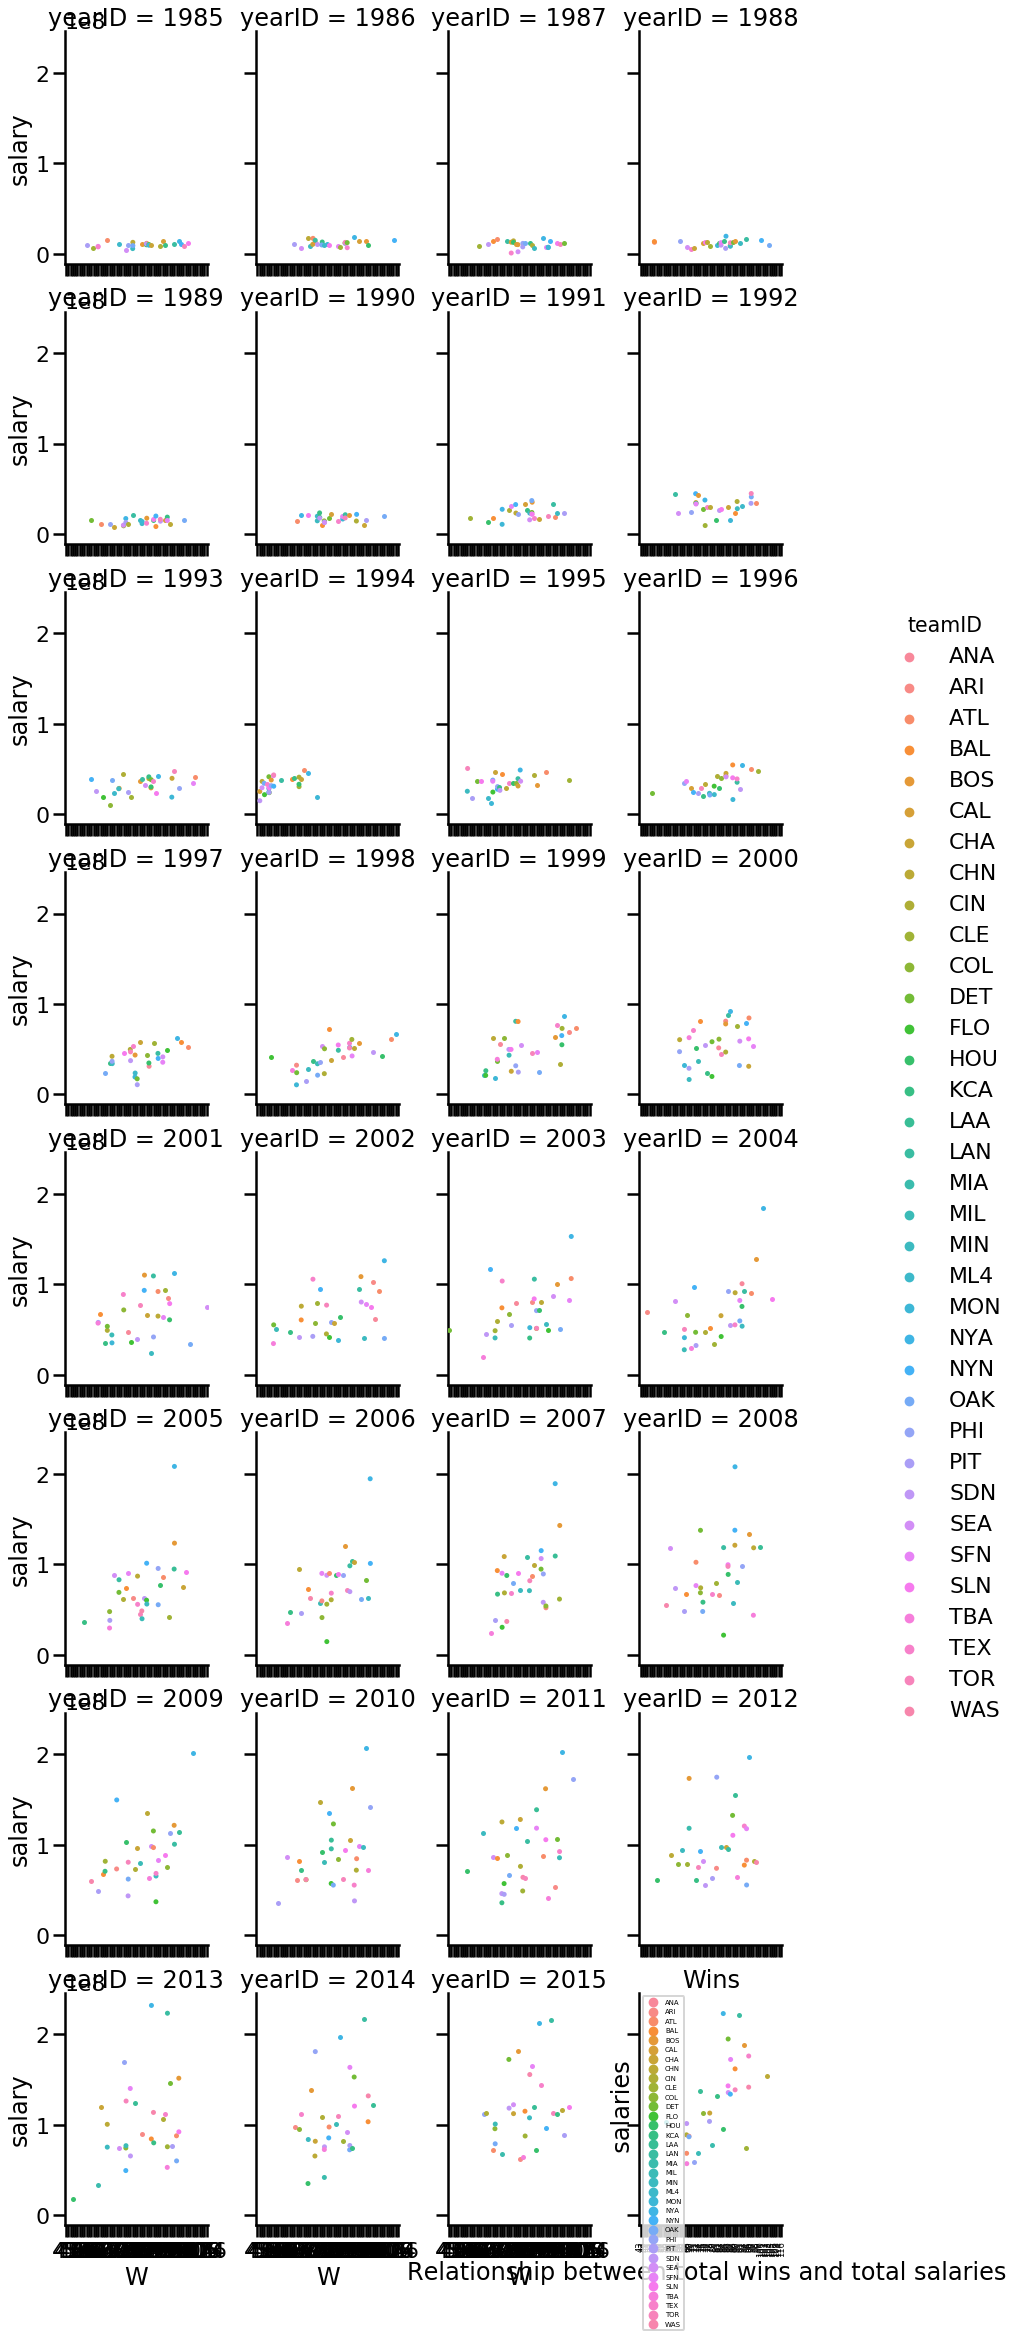

In [43]:
sns.catplot(x="W", y="salary",hue="teamID", col="yearID",col_wrap=4, data=sal_by_team_by_year2, kind="strip", height=4, aspect=.7);
plt.xlabel("Relationship between total wins and total salaries ")
plt.ylabel("  salaries ")
plt.xticks(rotation=90 ,fontsize='small')
plt.title("Wins")
plt.legend(fontsize='x-small', title_fontsize='20')

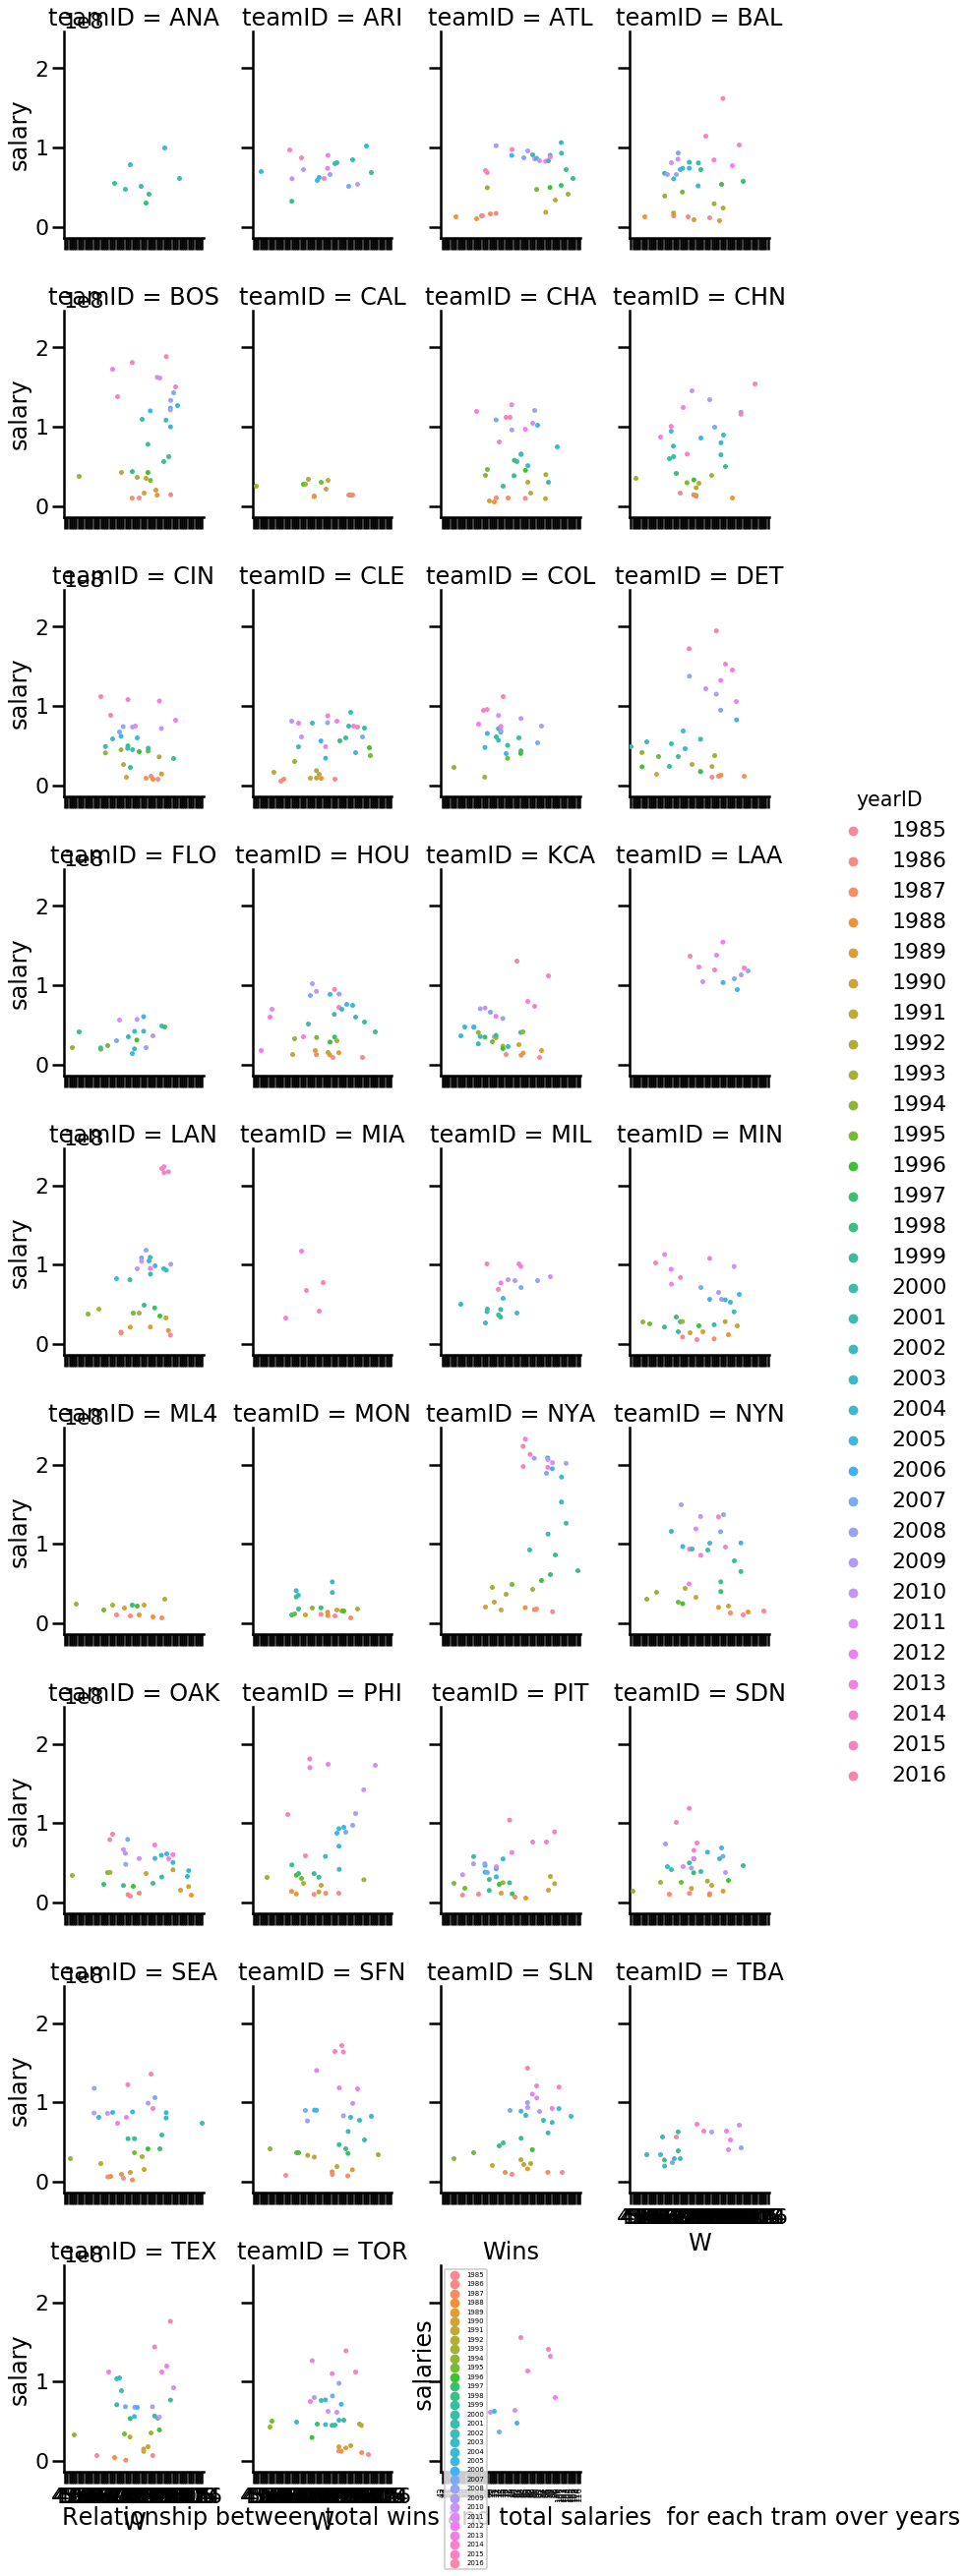

In [44]:
sns.catplot(x="W", y="salary",hue="yearID", col="teamID",col_wrap=4, data=sal_by_team_by_year2, kind="strip", height=4, aspect=.7);
plt.xlabel("Relationship between total wins and total salaries  for each tram over years")
plt.ylabel("  salaries ")
plt.xticks(rotation=90 ,fontsize='small')
plt.title("Wins")
plt.legend(fontsize='x-small', title_fontsize='20')